In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
df=pd.read_csv('Dataset/crop_yield1.csv')

C:\Users\WWAsanka\AppData\Local\Temp\ipykernel_3952\4225226915.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Dataset/crop_yield1.csv')


In [3]:
df.head(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122.0,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140.0,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106.0,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146.0,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110.0,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74.0,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90.0,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61.0,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127.0,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140.0,3.707293


In [4]:
df.shape

(1000000, 10)

In [5]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

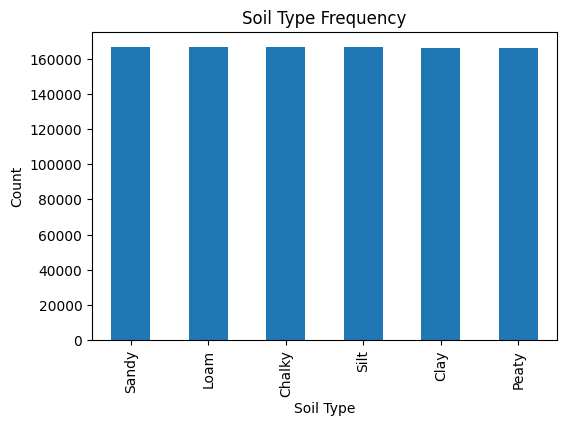

In [7]:
df['Soil_Type'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Soil Type Frequency")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.show()

<Figure size 600x400 with 0 Axes>

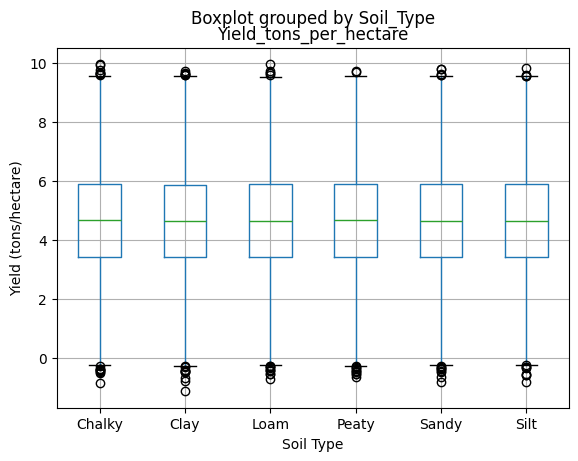

In [10]:
plt.figure(figsize=(6,4))
df.boxplot(column='Yield_tons_per_hectare', by='Soil_Type')
plt.xlabel("Soil Type")
plt.ylabel("Yield (tons/hectare)")
plt.show()

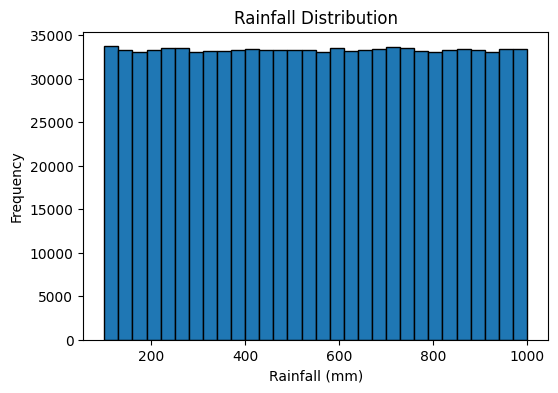

In [11]:
plt.figure(figsize=(6,4))
plt.hist(df['Rainfall_mm'], bins=30, edgecolor='black')
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

In [6]:
df.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               6
Temperature_Celsius       1
Fertilizer_Used           0
Irrigation_Used           1
Weather_Condition         2
Days_to_Harvest           1
Yield_tons_per_hectare    0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.shape

(999989, 10)

In [9]:
df['Region'].unique()

array(['West', 'South', 'North', 'East'], dtype=object)

In [10]:
df['Region'].value_counts()

Region
North    250170
West     250071
South    250050
East     249698
Name: count, dtype: int64

In [11]:
df['Soil_Type'].unique()

array(['Sandy', 'Clay', 'Loam', 'Silt', 'Peaty', 'Chalky'], dtype=object)

In [12]:
df['Soil_Type'].value_counts()

Soil_Type
Sandy     167118
Loam      166795
Chalky    166778
Silt      166669
Clay      166350
Peaty     166279
Name: count, dtype: int64

In [13]:
df['Crop'].unique()

array(['Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Crop
Maize      166823
Rice       166787
Barley     166776
Wheat      166669
Cotton     166585
Soybean    166349
Name: count, dtype: int64

In [15]:
df['Fertilizer_Used'].unique()

array([False,  True])

In [16]:
df['Fertilizer_Used'].value_counts()

Fertilizer_Used
False    500054
True     499935
Name: count, dtype: int64

In [17]:
df['Irrigation_Used'].unique()

array([True, False], dtype=object)

In [18]:
df['Irrigation_Used'].value_counts()

Irrigation_Used
False    500503
True     499486
Name: count, dtype: int64

In [19]:
df['Weather_Condition'].unique()

array(['Cloudy', 'Rainy', 'Sunny'], dtype=object)

In [20]:
df['Weather_Condition'].value_counts()

Weather_Condition
Sunny     333785
Rainy     333558
Cloudy    332646
Name: count, dtype: int64

In [21]:
df.head(2)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122.0,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140.0,8.527341


In [22]:
df['Rainfall_mm'].describe()

count    999989.000000
mean        549.981206
std         259.851466
min         100.000896
25%         324.887407
50%         550.122120
75%         774.738334
max         999.998098
Name: Rainfall_mm, dtype: float64

In [23]:
df['Temperature_Celsius'].describe()

count    999989.000000
mean         27.504922
std           7.220609
min          15.000034
25%          21.254409
50%          27.507292
75%          33.753246
max          39.999997
Name: Temperature_Celsius, dtype: float64

In [24]:
df['Days_to_Harvest'].describe()

count    999989.000000
mean        104.495042
std          25.953409
min          60.000000
25%          82.000000
50%         104.000000
75%         127.000000
max         149.000000
Name: Days_to_Harvest, dtype: float64

In [25]:
categorical_features=['Region','Soil_Type', 'Crop', 'Weather_Condition']
df1 = pd.get_dummies(df, columns=categorical_features, drop_first=False)
print(df1.head())

   Rainfall_mm  Temperature_Celsius  Fertilizer_Used Irrigation_Used  \
0   897.077239            27.676966            False            True   
1   992.673282            18.026142             True            True   
2   147.998025            29.794042            False           False   
3   986.866331            16.644190            False            True   
4   730.379174            31.620687             True            True   

   Days_to_Harvest  Yield_tons_per_hectare  Region_East  Region_North  \
0            122.0                6.555816        False         False   
1            140.0                8.527341        False         False   
2            106.0                1.127443        False          True   
3            146.0                6.517573        False          True   
4            110.0                7.248251        False         False   

   Region_South  Region_West  ...  Soil_Type_Silt  Crop_Barley  Crop_Cotton  \
0         False         True  ...           False

In [26]:
df2 = pd.concat([df1],axis='columns')
df2.head(2)

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122.0,6.555816,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
1,992.673282,18.026142,True,True,140.0,8.527341,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [27]:
df3=df2.copy()
df3['Rainfall_Bin'] = pd.cut(
    df3['Rainfall_mm'],
    bins=[0, 300, 600, 900, 1200],   # intervals
    labels=['Low', 'Medium', 'High', 'Very High']
)


df3['Temp_Bin'] = pd.cut(
    df3['Temperature_Celsius'],
    bins=[0, 15, 25, 35, 50],
    labels=['Cold', 'Mild', 'Warm', 'Hot']
)

df3['Harvest_Bin'] = pd.cut(
    df3['Days_to_Harvest'],
    bins=[0, 90, 120, 150, 200],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)
df3 = df3.drop(['Rainfall_mm','Temperature_Celsius','Days_to_Harvest'], axis=1)


In [28]:
df3.head()

,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,...,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny,Rainfall_Bin,Temp_Bin,Harvest_Bin
0,False,True,6.555816,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,High,Warm,Long
1,True,True,8.527341,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,Very High,Mild,Long
2,False,False,1.127443,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,Low,Warm,Medium
3,False,True,6.517573,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,Very High,Mild,Long
4,True,True,7.248251,False,False,True,False,False,False,False,...,False,False,False,True,True,False,False,High,Warm,Medium


In [29]:
categorical1_features=['Rainfall_Bin','Temp_Bin', 'Harvest_Bin']
df4 = pd.get_dummies(df3, columns=categorical1_features, drop_first=False)
print(df4.head())

   Fertilizer_Used Irrigation_Used  Yield_tons_per_hectare  Region_East  \
0            False            True                6.555816        False   
1             True            True                8.527341        False   
2            False           False                1.127443        False   
3            False            True                6.517573        False   
4             True            True                7.248251        False   

   Region_North  Region_South  Region_West  Soil_Type_Chalky  Soil_Type_Clay  \
0         False         False         True             False           False   
1         False          True        False             False            True   
2          True         False        False             False           False   
3          True         False        False             False           False   
4         False          True        False             False           False   

   Soil_Type_Loam  ...  Rainfall_Bin_High  Rainfall_Bin_Very High  \

In [30]:
df4.shape

(999989, 34)

In [31]:
df4.head()

,Fertilizer_Used,Irrigation_Used,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,...,Rainfall_Bin_High,Rainfall_Bin_Very High,Temp_Bin_Cold,Temp_Bin_Mild,Temp_Bin_Warm,Temp_Bin_Hot,Harvest_Bin_Short,Harvest_Bin_Medium,Harvest_Bin_Long,Harvest_Bin_Very Long
0,False,True,6.555816,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,True,True,8.527341,False,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
2,False,False,1.127443,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
3,False,True,6.517573,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
4,True,True,7.248251,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False


In [32]:
X = df4.drop(['Yield_tons_per_hectare'],axis='columns')
X.head(3)

,Fertilizer_Used,Irrigation_Used,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,...,Rainfall_Bin_High,Rainfall_Bin_Very High,Temp_Bin_Cold,Temp_Bin_Mild,Temp_Bin_Warm,Temp_Bin_Hot,Harvest_Bin_Short,Harvest_Bin_Medium,Harvest_Bin_Long,Harvest_Bin_Very Long
0,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,True,True,False,False,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


In [33]:
y=df4['Yield_tons_per_hectare']
y.head(3)

0    6.555816
1    8.527341
2    1.127443
Name: Yield_tons_per_hectare, dtype: float64

In [34]:
len(X)

999989

In [35]:
len(y)

999989

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [37]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8622802227068438

In [38]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86102743, 0.86240714, 0.86130095, 0.86211119, 0.86146062])

In [39]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\WWAsanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\WWAsanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\WWAsanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\WWAsanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

,model,best_score,best_params
0,linear_regression,0.861661,{}
1,lasso,-0.000004,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.850479,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [40]:
def get_rainfall_bin(rainfall):
    if rainfall <= 300:
        return "Rainfall_Bin_Low"
    elif rainfall <= 600:
        return "Rainfall_Bin_Medium"
    elif rainfall <= 900:
        return "Rainfall_Bin_High"
    else:
        return "Rainfall_Bin_Very High"

def get_temp_bin(temp):
    if temp <= 15:
        return "Temp_Bin_Cold"
    elif temp <= 25:
        return "Temp_Bin_Mild"
    elif temp <= 35:
        return "Temp_Bin_Warm"
    else:
        return "Temp_Bin_Hot"

def get_harvest_bin(days):
    if days <= 90:
        return "Harvest_Bin_Short"
    elif days <= 120:
        return "Harvest_Bin_Medium"
    elif days <= 150:
        return "Harvest_Bin_Long"
    else:
        return "Harvest_Bin_Very Long"


In [41]:
def predict_yield(fertilizer, irrigation,
                  region, soil, crop, weather,
                  rainfall, temperature, harvest_days):
    x = np.zeros(len(X.columns))

    # Boolean features
    x[X.columns.get_loc('Fertilizer_Used')] = int(fertilizer)
    x[X.columns.get_loc('Irrigation_Used')] = int(irrigation)

    # Categorical features + binned numeric features
    for feature in [region, soil, crop, weather,
                    get_rainfall_bin(rainfall),
                    get_temp_bin(temperature),
                    get_harvest_bin(harvest_days)]:
        if feature in X.columns:
            x[X.columns.get_loc(feature)] = 1
        else:
            print(f"Warning: {feature} not found in columns.")

    return lr_clf.predict([x])[0]


In [42]:
yield_pred = predict_yield(
    fertilizer=0,
    irrigation=1,
    region="Region_West",
    soil="Soil_Type_Sandy",
    crop="Crop_Cotton",
    weather="Weather_Condition_Cloudy",
    rainfall=900,
    temperature=28,
    harvest_days=122
)

print("Predicted Yield:", yield_pred, "tons/hectare")


Predicted Yield: 5.546626230658935 tons/hectare


C:\Users\WWAsanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
yield_pred = predict_yield(
    fertilizer=0,
    irrigation=1,
    region="Region_West",
    soil="Soil_Type_Sandy",
    crop="Crop_Cotton",
    weather="Weather_Condition_Cloudy",
    rainfall=897,
    temperature=27,
    harvest_days=122
)

print("Predicted Yield:", yield_pred, "tons/hectare")


Predicted Yield: 5.546626230658935 tons/hectare


C:\Users\WWAsanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
import pickle
with open('yield_prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [45]:
import json
columns = {
    'data_columns' : list(X.columns)
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))